# 🚢 Titanic Survival Analysis
This notebook follows a step-by-step to-do list for exploring and analyzing the Titanic dataset.

### 📌 Key Questions to Answer  
1. Did women and children have higher survival rates?  
2. How did passenger class (`Pclass`) affect survival?  
3. Did passengers who paid higher fares survive more?  
4. Did traveling with family (`SibSp`, `Parch`) improve survival chances?  
5. Did the embarkation port (`Embarked`) influence survival?  
6. Was there a correlation between age and survival?

## 🔍 Data Inspection & Cleaning
### ✅ Step 1: Load and Inspect Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('assets/Titanic-Dataset.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [8]:
df.loc[df['Age'] > df['Age'].mean(),['Age']]

,Age
1,38.0
3,35.0
4,35.0
6,54.0
11,58.0
...,...
873,47.0
879,56.0
881,33.0
885,39.0


### ✅ Step 2: Check for Missing Values

In [44]:
print(df.isnull().sum())
df.loc[df['Age'].isna(),['Age']] = df['Age'].mean()

print(df['Age'].isnull().sum())

df.loc[df['Embarked'].isna(),'Embarked'] = df['Embarked'].mode()[0]

print(df['Embarked'].isna().sum())

# df['Cabin'].isnull//
print(df.columns)
print(df.dropna(thresh=df.shape[0]-len(df)//2,axis=1).columns)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
0
0
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [ ]:
# new_df = pd.read_csv('assets/Titanic-Dataset.csv',index_col='PassengerId')
# new_df.sort_index(axis='index',ascending=False)

PassengerId
804    0.42
756    0.67
645    0.75
470    0.75
79     0.83
       ... 
860     NaN
864     NaN
869     NaN
879     NaN
889     NaN
Name: Age, Length: 891, dtype: float64

### ✅ Step 3: Handle Missing Data

In [54]:
# df = df.dropna(thresh=len(df)//2,axis=1)
print(df.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  
0      0  A/5 21171   7.2500        S  
1      0   PC 17599  71.2833        C  


### ✅ Step 4: Drop Unnecessary Columns

## 📊 Univariate Analysis

- Age: Histogram to see age distribution  
- Fare: Box plot to detect outliers  
- Survived: Pie chart  
- Sex, Pclass, Embarked: Bar plots

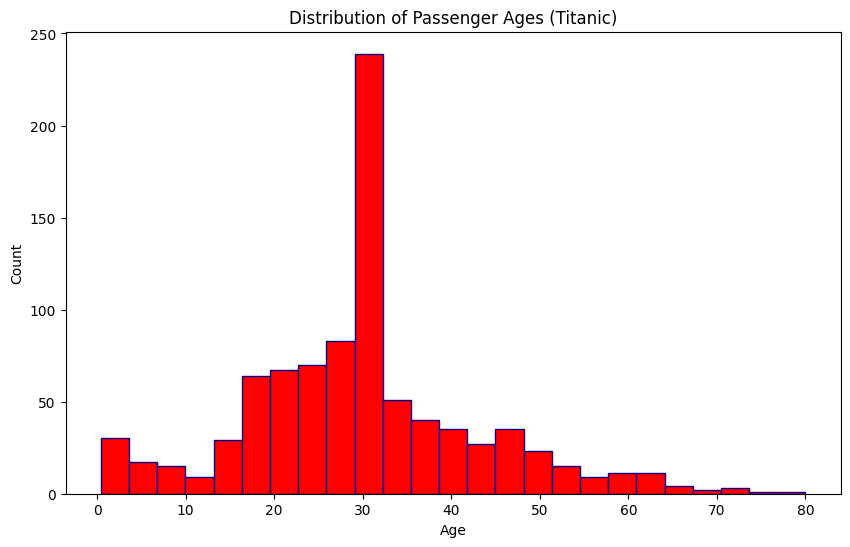

In [86]:
# df.nlargest(5,'Age')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df['Age'], 
        bins=25,
        color='red',
        edgecolor='darkblue')
ax.set_title('Distribution of Passenger Ages (Titanic)')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show()

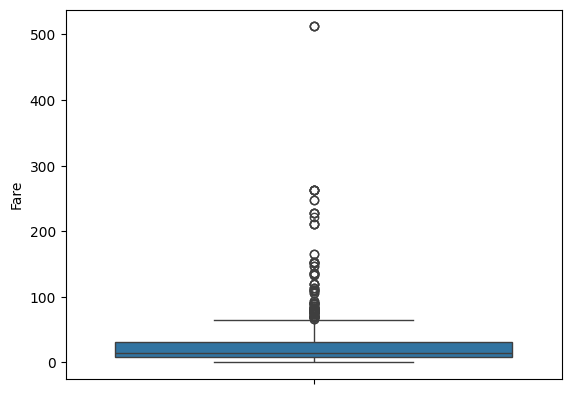

In [97]:
sns.boxplot(df['Fare'])
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q1 - Q3 
upper_bound = Q3 +1.5*IQR
outliers = df[df['Fare'] > upper_bound]

## 📊 Bivariate Analysis

- Survival vs. Sex: Bar plot  
- Survival vs. Pclass: Stacked bar plot  
- Survival vs. Age: Histograms or KDE plots  
- Survival vs. Fare: Box plot  
- Survival vs. Family Size: Bar plot

## 📊 Multivariate Analysis

- Survival by Pclass and Sex: Grouped bar plot  
- Survival by Age and Fare: Scatter plot colored by survival

## 🔥 Correlation Heatmap

- Check correlation between numerical features like Pclass, Fare, Age, FamilySize, and Survived

## 🔧 Feature Engineering

- Create FamilySize = SibSp + Parch  
- Create AgeGroup = child, teen, adult, senior  
- Create IsAlone = 1 if FamilySize == 0 else 0

## 📝 Summary of Findings
- Answer key questions  
- List top 3 factors influencing survival  
- Note surprising findings